In [1]:
!pip install git+https://github.com/ContextLab/davos.git
import davos

  Cloning https://github.com/ContextLab/davos.git to /tmp/pip-req-build-shx_2ybd
  Running command git clone -q https://github.com/ContextLab/davos.git /tmp/pip-req-build-shx_2ybd
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for davos: filename=davos-0.0.1-py3-none-any.whl size=76438 sha256=f30f12abc1be8282113ddb2c5e9816984b1a629b88c90e52c576bfe0bfdb8cb0
  Stored in directory: /tmp/pip-ephem-wheel-cache-6scus0vt/wheels/91/25/62/ff3e77f0c7b0be985afa1841e980aa00ba971e687beb29eb88
Successfully built davos


In [2]:
smuggle numpy as np
smuggle pandas as pd
smuggle hypertools as hyp

import os

     |████████████████████████████████| 59 kB 3.3 MB/s 
     |████████████████████████████████| 80 kB 3.9 MB/s 
     |████████████████████████████████| 1.1 MB 22.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=54810d7aabe4638a95e2439048f39ca9066e3497ba2891aa05f1e4116ed8da6f
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=3c9bc605000758a08fa64ebc12d452f8be3f7da9600650fa2e6e25bd5ebca796
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [3]:
!git clone https://github.com/ContextLab/generation-trajectory.git

Cloning into 'generation-trajectory'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 43 (delta 16), reused 34 (delta 9), pack-reused 0
Unpacking objects: 100% (43/43), done.


In [4]:
!pip install pydata-wrangler

     |████████████████████████████████| 776.8 MB 16 kB/s 
     |████████████████████████████████| 12.8 MB 23 kB/s 
     |████████████████████████████████| 69 kB 5.7 MB/s 
     |████████████████████████████████| 284 kB 58.7 MB/s 
     |████████████████████████████████| 237 kB 59.4 MB/s 
     |████████████████████████████████| 3.3 MB 43.8 MB/s 
     |████████████████████████████████| 85 kB 4.5 MB/s 
     |████████████████████████████████| 11.5 MB 19.0 MB/s 
     |████████████████████████████████| 1.2 MB 44.2 MB/s 
     |████████████████████████████████| 2.5 MB 52.3 MB/s 
     |████████████████████████████████| 123 kB 60.0 MB/s 
     |████████████████████████████████| 158 kB 54.3 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 62 kB 822 kB/s 
     |████████████████████████████████| 22.3 MB 30 kB/s 
     |████████████████████████████████| 56 kB 4.7 MB/s 
     |████████████████████████████████| 125 kB 68.9 MB/s 
     |███████████████████

In [5]:
import datawrangler as dw

In [6]:
import pandas as pd 
import numpy as np 
import re

df = pd.read_csv('https://raw.githubusercontent.com/gokulsrin/PossibilityGeneration/main/Full/IndDiffGenerationFull.csv')

In [7]:
#the experiment i want to run is as such: I want to look at all of the first possibilities generated, cluster them, and see whether the clusters correspond to beck scores
g = df.groupby("completionCode")

#array pos containing all possibiilties
pos = []
#corresponding ids array tracking the person it came from such that the id of pos[3] is ids[3]
ids = []

for id, group in g:
  rows = group.iloc[0:60, 16]
  vigns = np.split(rows, 10)
  for vign in vigns:
    vign = list(vign)
    if not pd.isna(vign[0]):
      pos.append(vign[0])
      ids.append(id)

In [8]:
bdi_options = {"Sadness": ["0 -- I do not feel sad.", "1 -- I feel sad much of the time.", "2 -- I am sad all the time.", "3 -- I am so sad or unhappy I can't stand it."],

    "Pessimism": ["0 -- I am not discouraged about my future.", "1 -- I feel more discouraged about my future than I used to be.",
        "2 -- I do not expect things to work out for me.", "3 -- I feel my future is hopeless and will only get worse."],

    "PastFailure": ["0 -- I do not feel like a failure.", "1 -- I feel more discouraged about my future than I used to",
        "2 -- As I look back I see a lot of failures.", "3 -- I feel I am a total failure as a person"],

    "LossofPleasure": ["0 -- I get as much pleasure as I ever did from the things I enjoy.", "1 -- I don't enjoy things as much as I used to.",
        "2 -- I get very little pleasure from the things I used to enjoy.", "3 -- I can't get any pleasure from the things I used to enjoy."],

    "GuiltyFeelings": ["0 -- I don't feel particularly guilty.", "1 -- I feel guilty over many things I have done or should have done.",
        "2 -- I feel quite guilty most of the time.", "3 -- I feel guilty all of the time."],

    "PunishmentFeelings": ["0 -- I don't feel I am being punished.", "1 -- I feel I may be punished.",
        "2 -- I expect to be punished.", " 3 -- I feel I am being punished."],

    "SelfDislike": ["0 -- I feel the same about myself as ever.", "1 -- I have lost confidence in myself.",
        "2 -- I am disappointed in myself.", "3 -- I dislike myself. "],

    "SelfCriticalness": ["0 -- I don't criticize or blame myself more than usual.", "1 -- I am more critical of myself than I used to be.",
    "2 -- I criticize myself for all of my faults.", "3 -- I blame myself for everything bad that happens."],

    "Crying": ["0 -- I don't cry anymore than I used to.", "1 -- I cry more than I used to.",
        "2 -- I cry over every little thing.", "3 -- I feel like crying but I can't."],

    "Agitation": ["0 -- I am no more restless or wound up than usual.", "1 -- I feel more restless or wound up than usual.",
        "2 -- I am so restless or agitated that it's hard to stay still.", "3 -- I am so restless or agitated that I have to keep moving or doing something."],

    "LossofInterest": ["0 -- I have not lost interest in other people or activities.", "1 -- I am less interested in other people or things than before.",
        "2 -- I have lost most of my interest in other people or things.", "3 -- It's hard to get interested in anything. "],

    "Indecisiveness": ["0 -- I make decisions about as well as ever.", "1 -- I find it more difficult to make decisions than usual.",
        "2 -- have much greater difficulty in making decisions than I used to.", "3 -- I have trouble making any decisions."],

    "Worthlessness": ["0 -- I do not feel I am worthless.", "1 -- I don't consider myself as worthwhile and useful as I used to.", 
        "2 -- I feel more worthless as compared to other people.", "3 -- I feel utterly worthless."],

    "LossofEnergy": ["0 -- I have as much energy as ever.", "1 -- I have less energy than I used to have.",
        "2 -- I don't have enough energy to do very much.", "3 -- I don't have enough energy to do anything. "],

    "ChangesinSleepingPattern": ["0 -- I have not experienced any change in my sleeping pattern.", "1a -- I sleep somewhat more than usual.",
        "1b -- I sleep somewhat less than usual.", "2a -- I sleep a lot more than usual.", "2b -- I sleep a lot less than usual.",
        "3a -- I sleep most of the day.", "3b -- I wake up 1-2 hours early and can't get back to sleep."],

    "Irratability": ["0 -- I am no more irritable than usual.", "1 -- I am more irritable than usual.",
        "2 -- I am much more irritable than usual.", "3 -- I am irritable all the time."],

    "ChangesinAppetite": ["0 -- I have not experienced any change in my appetite.", "1a -- My appetite is somewhat less than usual.",
        "1b -- My appetite is somewhat greater than usual.", "2a -- My appetite is much less than before.",
        "2b -- My appetite is much greater than usual.", "3a -- I have no appetite at all.", "3b -- I crave food all the time."],

    "ConcentrationDifficulty": ["0 -- I can concentrate as well as ever.", "1 -- I can't concentrate as well as usual.",
        "2 -- It's hard to keep my mind on anything for very long.", "3 -- I find I can't concentrate on anything."],

    "TirednessorFatigue": ["0 -- I am no more tired or fatigued than usual.", "1 -- I get more tired or fatigued more easily than usual.",
        "2 -- I am too tired or fatigued to do a lot of the things I used to do.", "3 -- I am too tired or fatigued to do most of the things I used to do."],

    "LossofInterestinSex": ["0 -- I have not noticed any recent change in my interest in sex.", "1 -- I am less interested in sex than I used to be.",
        "2 -- I am much less interested in sex now.", "3 -- I have lost interest in sex completely."]
}

#make a dictionary that maps scores to specific bdi options for efficiency later on (e.g., {1: "I feel sad all the time"})
bdi_dic = {}
for key in bdi_options:
    options = bdi_options.get(key)
    for option in options:
        ops = option.split("--")
        score = re.sub("[^0-9]", "", ops[0])
        text = ops[1].strip()
        bdi_dic[text] = score
#make dic for bai scoring
bai_dic = {"Not at all.":0, "Mildly but it didn't bother me much.": 1, "Moderately - it wasn't pleasant at time.": 2, "Severely - it bothered me a lot.":3}


In [9]:
participants = df.groupby("completionCode")
scores = {}
#calc average sentiemnt score for each participant
for id, info in participants:
  #init certiain things 
  scores[id] = {}
  scores.get(id)['bdi'] = 0 
  scores.get(id)['bai'] = 0 
  for response in info['response']:
    #if it is bdi response
    if bdi_dic.get(response) != None:
      scores.get(id)['bdi'] = scores.get(id).get('bdi') + int(bdi_dic.get(response))
    #if bai response
    if bai_dic.get(response) != None:
      scores.get(id)['bai'] = scores.get(id).get('bai') +int(bai_dic.get(response))
  scores.get(id)['beck'] = scores.get(id).get('bai') + scores.get(id).get('bdi')

In [10]:
#cleaning out some of the folks who have ridiculous and innac. beck scores
# toremove = set()
# for p in scores:
#     if scores.get(p).get('beck') > 55:
#       toremove.add(p)
# i = 0
# while i < len(ids):
#   if ids[i] in toremove:
#     pos.pop(i)
#     ids.pop(i) 
#     i -= 1
#   i += 1

In [24]:
gpt2 = {'model': 'TransformerDocumentEmbeddings', 'args': ['gpt2'], 'kwargs': {}}
embeddings = dw.wrangle(pos, text_kwargs={'model': gpt2})

In [25]:
num_clusters = 3
labels = hyp.cluster(embeddings, cluster='KMeans', n_clusters=num_clusters)

In [26]:
clusters = [set() for i in range(num_clusters)]
for i in range(len(labels)):
  if ids[i] not in toremove:
    clusters[labels[i]].add(ids[i])
  

In [ ]:
cluster

In [27]:

clusters_beck = [0] * num_clusters
for i in range(len(clusters)):
  s = 0 
  for id in clusters[i]:
    if  scores.get(id).get('beck') != None:
      s += scores.get(id).get('beck')
  if len(clusters[i]) > 0:
    clusters_beck[i] = s/len(clusters[i])
  else:
    clusters_beck[i] = None

In [28]:
clusters_beck

[12.50413223140496, 10.566666666666666, 12.13375796178344]

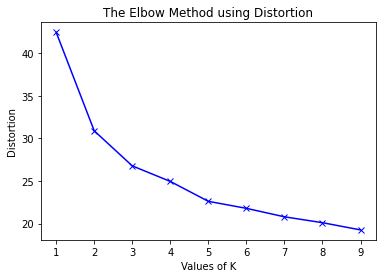

In [29]:
# FROM GEEKS FOR GEEKS
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# FROM GEEKS FOR GEEKS
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X = embeddings

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
# FROM GEEKS FOR GEEKS
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

#per the method -- 3 clusters seem to be optimal 

Here, we will cluster at the participant level. We will take the first possibility for each participant, concat... and then there will be # participants rows, then cluster on this..